<a href="https://colab.research.google.com/github/pauhsainz/PRA3024/blob/main/PRA3024_LHCb_Assignment_Paulina_H_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##My browser kept crashing for no (apparent) reason when trying to save the template Chris provided for us, so I just copied the necessary code cells onto the py2 blank template provided.

In [59]:
#Colab only
#we are going to make a directory called APPS
!mkdir -p APPS
#Now we move to our directory called APPS and we download ROOT from the CERN server, this version is chosen because it runs on this machine - if you want to run this locally check the versions!
!cd APPS && wget https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz 
#Now we extract our downloaded file:
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz

--2021-03-01 16:08:42--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.18.236, 2001:1458:201:ee::100:6
Connecting to root.cern.ch (root.cern.ch)|137.138.18.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.1’

root_v6.13.08.Linux 100%[===================>] 131.05M  26.6MB/s    in 5.8s    

2021-03-01 16:08:49 (22.6 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.1’ saved [137415272/137415272]



In [61]:
#Colab only:
#now we can extract some files from ROOT and ensure that we can access the libraries. We use some python key words to get access to the right files:

import sys

sys.path.append("/content/APPS/root/lib")

import ctypes


ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathMore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libPyROOT.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGpad.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMinuit.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libFoam.so')

import ROOT

Warning in <TFile::Append>: Replacing existing TH1: gauss (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


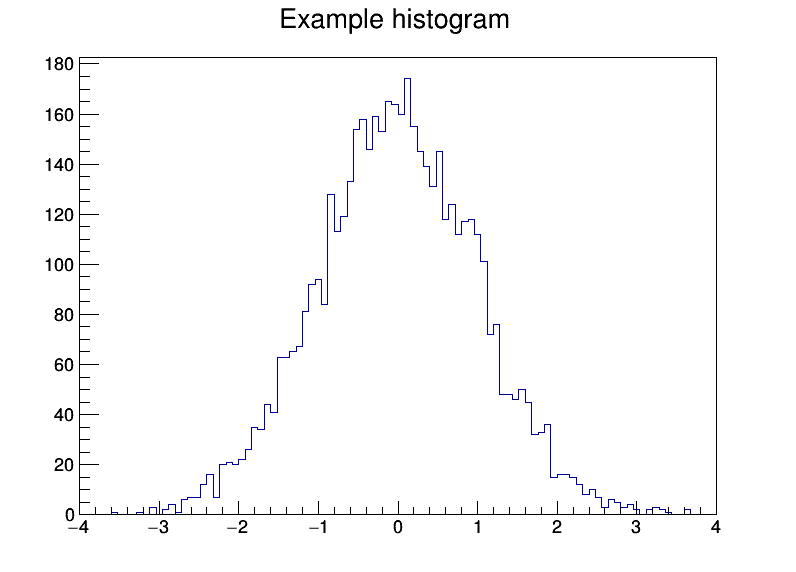

In [64]:

#Now we can check if we have everything working as we expect: 
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
data_path = "/content/drive/MyDrive/MSP/PRA3024/B2HHH_MagnetUp.root"

[#1] INFO:Eval -- RooAbsReal::attachToTree(H1_PX) TTree Float_t branch H1_PX will be converted to double precision
[#1] INFO:Eval -- RooAbsReal::attachToTree(H1_PY) TTree Float_t branch H1_PY will be converted to double precision
[#1] INFO:Eval -- RooAbsReal::attachToTree(H1_PZ) TTree Float_t branch H1_PZ will be converted to double precision
[#1] INFO:Eval -- RooTreeDataStore::loadValues(data) Ignored 3305139 out of range events


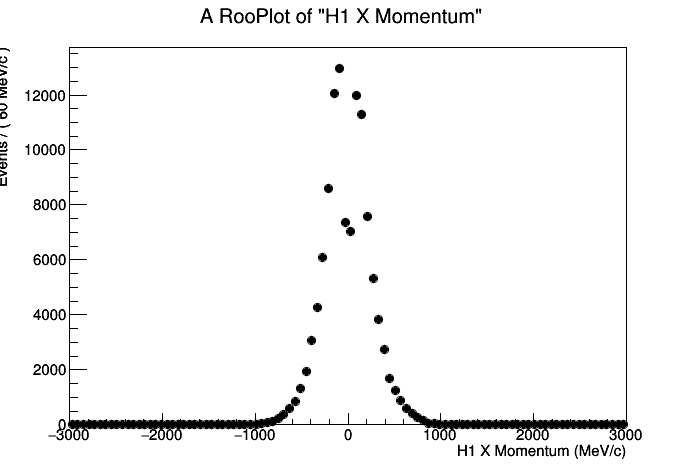

In [67]:
#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open(data_path, "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("data")
#Now we can grab some variables as a test:
ymomentum = ROOT.RooRealVar("H1_PY","H1 Y Momentum",-3000,3000,"MeV/c")
xmomentum = ROOT.RooRealVar("H1_PX","H1 X Momentum",-3000,3000,"MeV/c")
zmomentum = ROOT.RooRealVar("H1_PZ","H1 Z Momentum",-3000,3000,"MeV/c")
# We then create a dataset for us to play with
data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")
# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("c","c")
frame = xmomentum.frame()
data.plotOn(frame)
frame.Draw()
c.Draw()


In [11]:
data.get(1).getRealValue("H1_PY")

-199.95687866210938

In [12]:
f.ls()

TFile**		/content/drive/MyDrive/MSP/PRA3024/B2HHH_MagnetUp.root	
 TFile*		/content/drive/MyDrive/MSP/PRA3024/B2HHH_MagnetUp.root	
  OBJ: TTree	data	LHCB data : 0 at: 0x55735b92d600
  OBJ: RooPlot	frame_H1_PX_557361781ba0	A RooPlot of "H1 X Momentum" : 0 at: 0x557361781ba0
  KEY: TTree	data;14	LHCB data
  KEY: TTree	data;13	LHCB data


In [13]:
tree.Show()

======> EVENT:3420194
 B_FlightDistance = 8.43893
 B_VertexChi2    = 7.84392
 H1_PX           = 816.635
 H1_PY           = 368.774
 H1_PZ           = 14055.8
 H1_ProbK        = 0.00679082
 H1_ProbPi       = 0.868581
 H1_Charge       = -1
 H1_IPChi2       = 910.454
 H1_isMuon       = 0
 H2_PX           = -587.363
 H2_PY           = -159.705
 H2_PZ           = 41307.4
 H2_ProbK        = 0.0221071
 H2_ProbPi       = 0.713949
 H2_Charge       = 1
 H2_IPChi2       = 1.76096
 H2_isMuon       = 0
 H3_PX           = -3647.65
 H3_PY           = -960.227
 H3_PZ           = 43878.3
 H3_ProbK        = 0.0291707
 H3_ProbPi       = 0.881665
 H3_Charge       = 1
 H3_IPChi2       = 589.565
 H3_isMuon       = 0
 H1_Ptot         = 14084.3
 H1_type         = 1
 H1_E            = 14085
 H2_Ptot         = 41311.9
 H2_type         = 1
 H2_E            = 41312.1
 H3_Ptot         = 44040.1
 H3_type         = 1
 H3_E            = 44040.3
 M_Ptot          = 99303.1
 M_E             = 99437.4
 M_m0            = 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


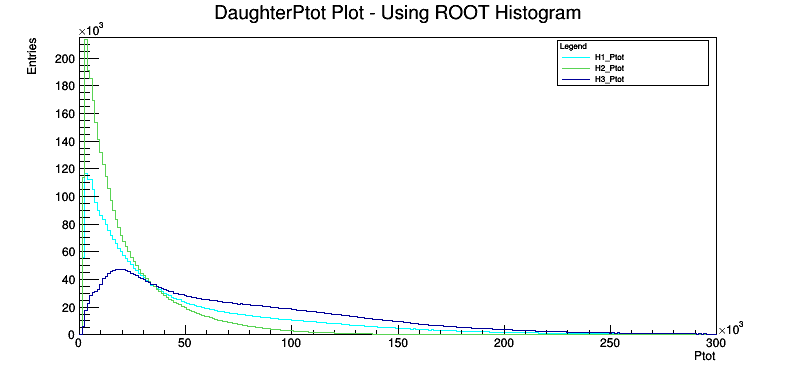

In [30]:
#Making a plot of the Total momentum of each of the three daughters
ROOT.gStyle.SetOptStat(0)
c = ROOT.TCanvas("c", "c", 800, 400)

tree.Draw("H1_Ptot>>h1(250, 0, 300000)")
h1 = ROOT.gDirectory.Get("h1")

tree.Draw("H2_Ptot>>h2(250, 0, 300000)")
h2 = ROOT.gDirectory.Get("h2")

tree.Draw("H3_Ptot>>h3(250, 0, 300000)")
h3 = ROOT.gDirectory.Get("h3")

max = 0
for h in [h1,h2,h3]:
  if h.GetMaximum() >= max:
    max = h.GetMaximum()

varname = "Ptot"

h1.SetMaximum(max + 1500)
h1.SetTitle("Daughter" + varname + " Plot - Using ROOT Histogram")
h1.GetXaxis().SetTitle(varname)
h1.GetYaxis().SetTitle("Entries")
h1.SetLineColor(7) # sky blue
h1.SetLineWidth(1)

h2.SetTitle(varname)
h2.SetLineColor(8) # green
h2.SetLineWidth(1)

h1.Draw()
h2.Draw("SAME")
h3.Draw("SAME")

leg = ROOT.TLegend(0.11 + 0.59, 0.77, 0.3 + 0.59, 0.89)
leg.SetHeader("Legend")
leg.AddEntry(h1, "H1_Ptot", "l")
leg.AddEntry(h2, "H2_Ptot", "l")
leg.AddEntry(h3, "H3_Ptot", "l")

leg.Draw("same")

c.Draw()

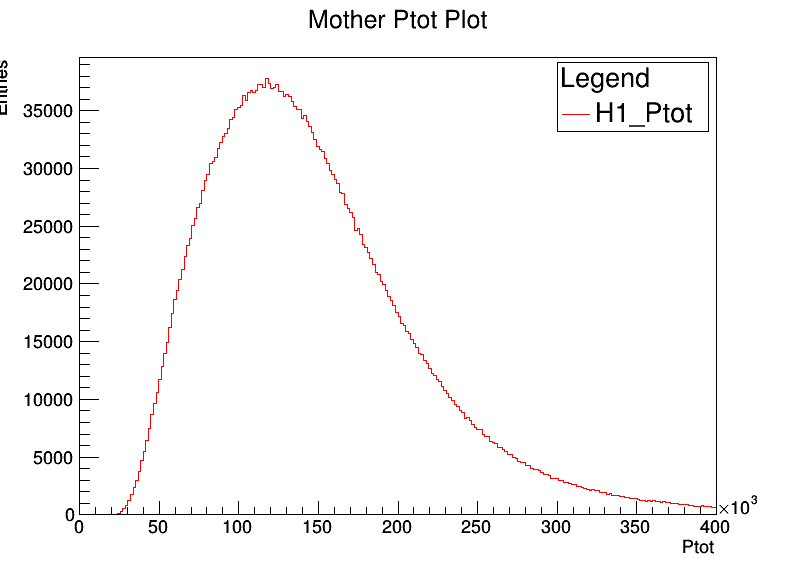

In [68]:
#use the histogram plotting tools, plot the momentum of the mother
c2 = ROOT.TCanvas("c2", "Ptot 1", 800, 600)

tree.Draw("M_Ptot>>h1(250, 0, 400000)")
h1 = ROOT.gDirectory.Get("h1")

varname = "Ptot"

h1.SetTitle( "Mother " + varname + " Plot")
h1.GetXaxis().SetTitle(varname)
h1.GetYaxis().SetTitle("Entries")
h1.SetLineColor(2) # red
h1.SetLineWidth(1)

h1.Draw()

leg = ROOT.TLegend(0.11 + 0.59, 0.77, 0.3 + 0.59, 0.89)
leg.SetHeader("Legend")
leg.AddEntry(h1, "H1_Ptot", "l")

leg.Draw("same")

c2.Draw()

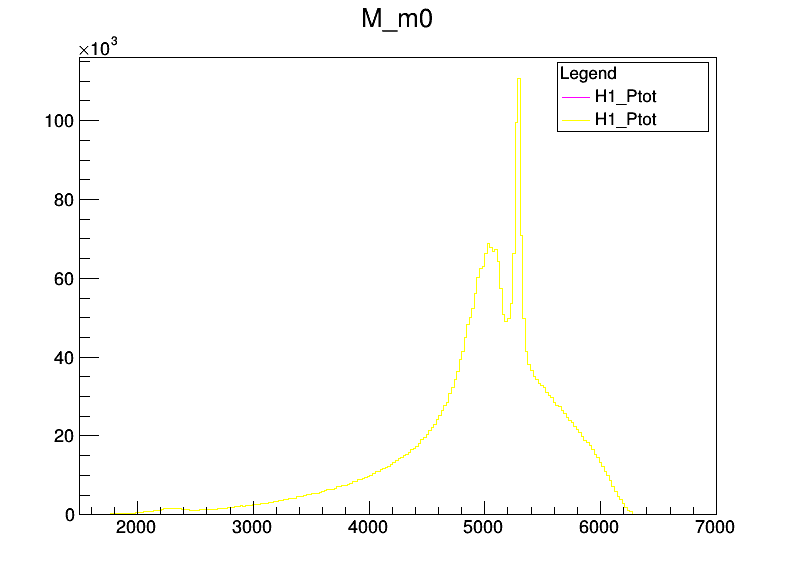

In [69]:
#Now plot a histogram of the range of masses of the B meson.
#Does this match what we would expect from theory?

ROOT.gStyle.SetOptStat(0)

c3 = ROOT.TCanvas("c3", "Ptot 1", 800, 600)

tree.Draw("sqrt(M_E*M_E - M_Ptot*M_Ptot*1**2)/1**2>>H(250, 1500, 7000)")
H = ROOT.gDirectory.Get("H")

tree.Draw("M_m0>>h1(250, 1500, 7000)")
h1 = ROOT.gDirectory.Get("h1")

varname = "Ptot"

H.SetTitle("Daughter " + varname + " Plot")
H.GetXaxis().SetTitle(varname)
H.GetYaxis().SetTitle("Entries")
H.SetLineColor(6) # purple
H.SetLineWidth(1)
H.Draw()

h1.SetLineColor(5) # yellow
h1.SetLineWidth(1)
h1.Draw()

leg = ROOT.TLegend(0.11 + 0.59, 0.77, 0.3 + 0.59, 0.89)
leg.SetHeader("Legend")
leg.AddEntry(H, "H1_Ptot", "l")
leg.AddEntry(h1, "H1_Ptot", "l")


leg.Draw("same")

c3.Draw()

#We can see that the pre stored mass distribution is exactly the same as the calculated one


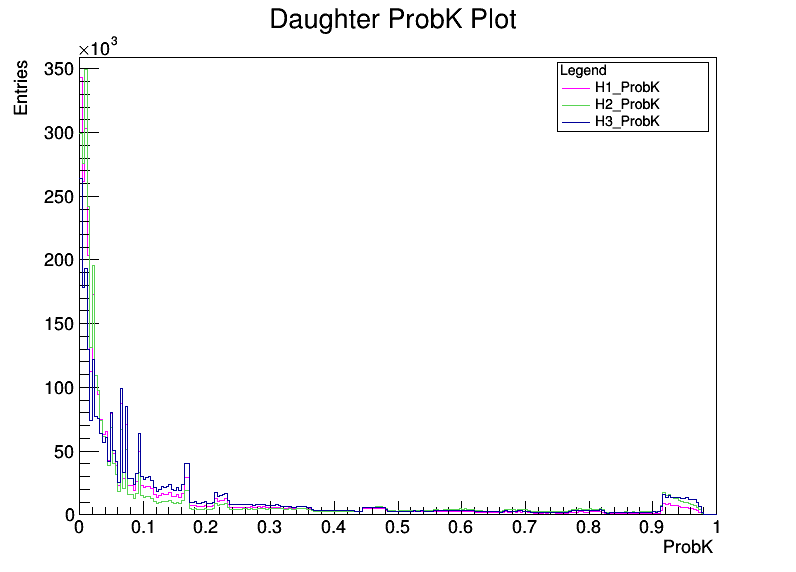

In [70]:
#Make plots of H1/H2/H3 _ProbK on one plot
ROOT.gStyle.SetOptStat(0)

xval = 1
varname = "ProbK"

c4 = ROOT.TCanvas("c4", "c4", 800, 600)

tree.Draw("H1_{0}>>h1(250, 0, {1})".format(varname, xval))
h1 = ROOT.gDirectory.Get("h1")

tree.Draw("H2_{0}>>h2(250, 0, {1})".format(varname, xval))
h2 = ROOT.gDirectory.Get("h2")

tree.Draw("H3_{0}>>h3(250, 0, {1})".format(varname, xval))
h3 = ROOT.gDirectory.Get("h3")

max = 0
for h in [h1,h2,h3]:
  if h.GetMaximum() >= max:
    max = h.GetMaximum()

h1.SetMaximum(max + 10000)
h1.SetTitle("Daughter " + varname + " Plot")
h1.GetXaxis().SetTitle(varname)
h1.GetYaxis().SetTitle("Entries")
h1.SetLineColor(6) # purple
h1.SetLineWidth(1)

h2.SetTitle(varname)
h2.SetLineColor(8) # green
h2.SetLineWidth(1)

h1.Draw()
h2.Draw("SAME")
h3.Draw("SAME")

leg = ROOT.TLegend(0.11 + 0.59, 0.77, 0.3 + 0.59, 0.89)
leg.SetHeader("Legend")
leg.AddEntry(h1, "H1_{}".format(varname), "l")
leg.AddEntry(h2, "H2_{}".format(varname), "l")
leg.AddEntry(h3, "H3_{}".format(varname), "l")

leg.Draw("same")

c4.Draw()

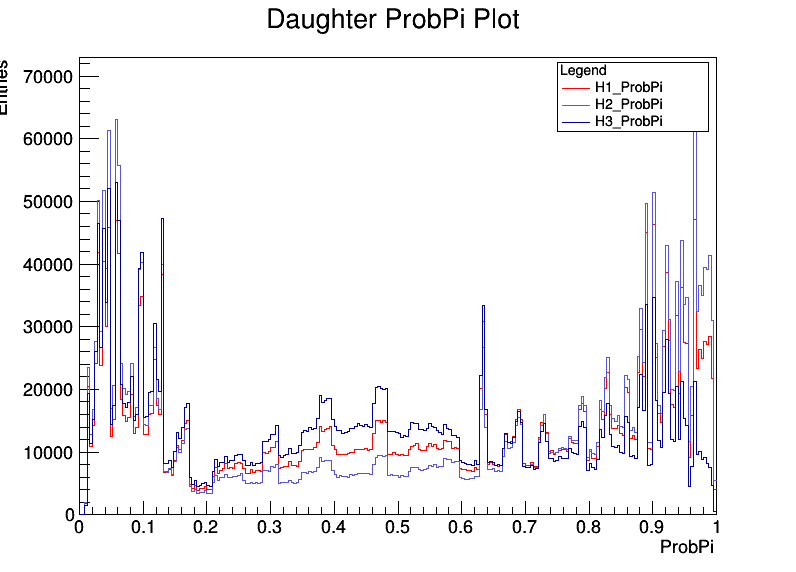

In [71]:
#Make plots of H1/H2/H3 _ProbPi on one plot
xval = 1
varname = "ProbPi"

c5 = ROOT.TCanvas("c5", "c5", 800, 600)

tree.Draw("H1_{0}>>h1(250, 0, {1})".format(varname, xval))
h1 = ROOT.gDirectory.Get("h1")

tree.Draw("H2_{0}>>h2(250, 0, {1})".format(varname, xval))
h2 = ROOT.gDirectory.Get("h2")

tree.Draw("H3_{0}>>h3(250, 0, {1})".format(varname, xval))
h3 = ROOT.gDirectory.Get("h3")

max = 0
for h in [h1,h2,h3]:
  if h.GetMaximum() >= max:
    max = h.GetMaximum()

h1.SetMaximum(max + 10000)
h1.SetTitle("Daughter " + varname + " Plot")
h1.GetXaxis().SetTitle(varname)
h1.GetYaxis().SetTitle("Entries")
h1.SetLineColor(2) # red
h1.SetLineWidth(1)

h2.SetTitle(varname)
h2.SetLineColor(9) # blue
h2.SetLineWidth(1)

h1.Draw()
h2.Draw("SAME")
h3.Draw("SAME")

leg = ROOT.TLegend(0.11 + 0.59, 0.77, 0.3 + 0.59, 0.89)
leg.SetHeader("Legend")
leg.AddEntry(h1, "H1_{}".format(varname), "l")
leg.AddEntry(h2, "H2_{}".format(varname), "l")
leg.AddEntry(h3, "H3_{}".format(varname), "l")

leg.Draw("same")

c5.Draw()

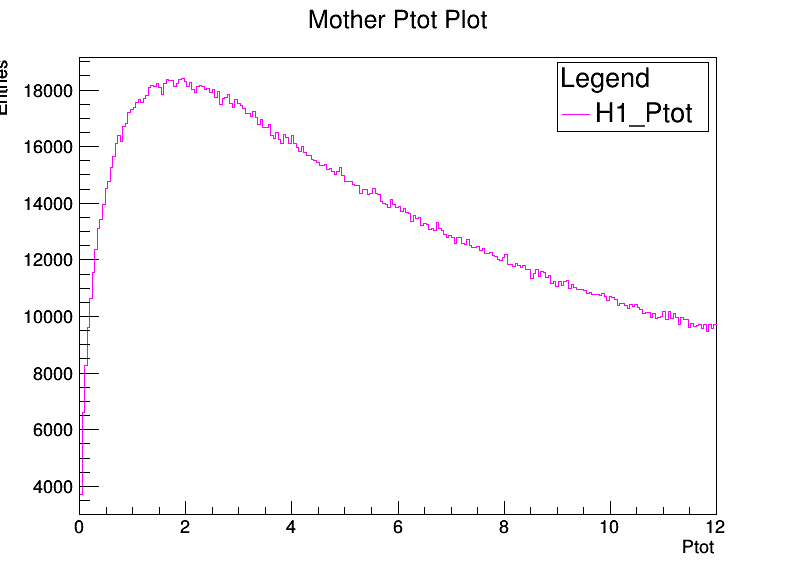

In [72]:
#For all our particles, make a plot of the B_VertexChi2
c6 = ROOT.TCanvas("c6", "c6", 800, 600)

xmax = tree.GetMaximum("B_VertexChi2")

tree.Draw("B_VertexChi2>>h1(250, 0, {})".format(xmax))
h1 = ROOT.gDirectory.Get("h1")

varname = "Ptot"

h1.SetTitle("Mother " + varname + " Plot")
h1.GetXaxis().SetTitle(varname)
h1.GetYaxis().SetTitle("Entries")
h1.SetLineColor(6) # purple
h1.SetLineWidth(1)

h1.Draw()

leg = ROOT.TLegend(0.11 + 0.59, 0.77, 0.3 + 0.59, 0.89)
leg.SetHeader("Legend")
leg.AddEntry(h1, "H1_Ptot", "l")
leg.Draw("same")

c6.Draw()

In [73]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon
#Which I make my own
selection=("H1_ProbPi>0.9 && H2_ProbPi>0.9 && H3_ProbPi>0.9 && H1_isMuon >0.9")


In [74]:
#To apply the selection - we can use the copytree command:
selection=("H1_ProbK>0.3 && H2_ProbK>0.3 && H3_ProbK>0.3 && H1_ProbK>H1_ProbPi && H2_ProbK>H2_ProbPi && H3_ProbK>H3_ProbPi && !H1_isMuon && !H2_isMuon && !H2_isMuon")
CutTree=tree.CopyTree(selection)

#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree

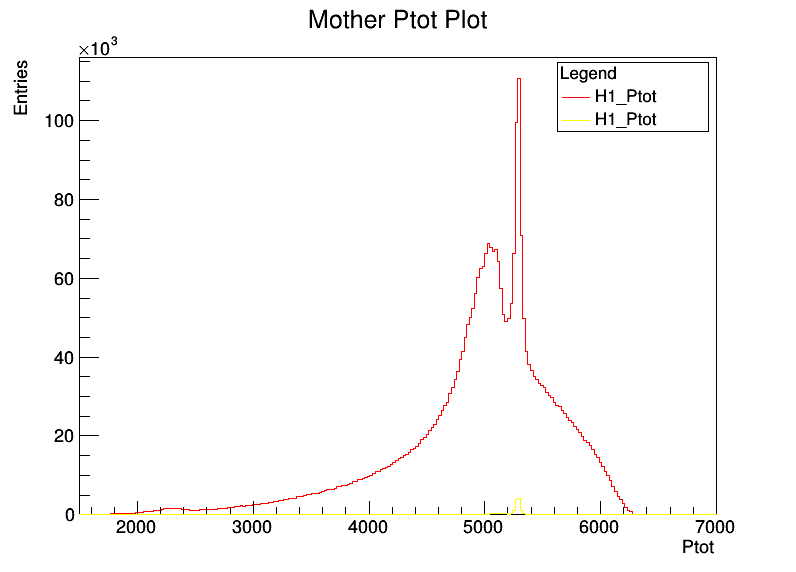

In [75]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the tree (pre-cuts) and the CutTree (post-cuts)
#What do you notice about your histogram now?

c7 = ROOT.TCanvas("c7", "c7", 800, 600)


tree.Draw("M_m0>>h1(250, 1500, 7000)")
h1 = ROOT.gDirectory.Get("h1")

CutTree.Draw("M_m0>>h2(250, 1500, 7000)")
h2 = ROOT.gDirectory.Get("h2")

varname = "Ptot"

h1.SetTitle("Mother " + varname + " Plot")
h1.GetXaxis().SetTitle(varname)
h1.GetYaxis().SetTitle("Entries")
h1.SetLineColor(2) # red
h1.SetLineWidth(1)

h2.SetLineColor(5) # yellow
h2.SetLineWidth(1)

h1.Draw()
h2.Draw("same")

leg = ROOT.TLegend(0.11 + 0.59, 0.77, 0.3 + 0.59, 0.89)
leg.SetHeader("Legend")
leg.AddEntry(h1, "H1_Ptot", "l")
leg.AddEntry(h2, "H1_Ptot", "l")

leg.Draw("same")

c7.Draw()

In [76]:
#define physical measurment that we want to fit using RooRealVar
mass = ROOT.RooRealVar("M_m0","Mass",5150,5400,"MeV/C^{2}")

#passing the rest of the variables into the model
#For the RooRealVar the last three parameters are given, "starting value" and min/max values
gaussMean = ROOT.RooRealVar("Mean","Mean",5000,5150,5400)
gaussWidth = ROOT.RooRealVar("Width","Width",40,0,7000)

#Now we have enough to make our Model for the signal:

Gauss=ROOT.RooGaussian("Gauss","Gaussian Signal",mass,gaussMean,gaussWidth)
Gauss_Norm= ROOT.RooRealVar("Gauss_Norm","Signal Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 3)
#We also need a background, so let's use a (simple) exponential:

exponent=ROOT.RooRealVar("exponent", "C", -0.02, -2, +2)
exp_Norm= ROOT.RooRealVar("exp_Norm","Background Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 2)

#Define the  model for the background:

Bkgnd=ROOT.RooExponential("Bkgnd","Exponential Background",mass,exponent)

#Now we need to combine these two functions into a single PDF (probability density function)
#and we need to add the normalisation factors at the end as scaling factors

model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),ROOT.RooArgList(Gauss_Norm, exp_Norm) )

In [77]:
#Put our data set into a RooDataSet structure

data_to_fit=ROOT.RooDataSet("Data Set","data_to_fit", CutTree, ROOT.RooArgSet(mass))

#Then we can do the fitting:

model.fitTo(data_to_fit)

#if everything went well, you will see the outputs of RooFit below

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Eval -- RooAbsReal::attachToTree(M_m0) TTree Float_t branch M_m0 will be converted to double precision
[#1] INFO:Eval -- RooTreeDataStore::loadValues(Data Set) Ignored 5685 out of range events
[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gauss,Bkgnd)
 **********
 **   28 **SET PRINT           1
 **********
 **********
 **   29 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Gauss_Norm   1.14006e+05  5.70030e+04    0.00000e+00  1.02606e+07
 MINUIT WARNING IN PARAM DEF
 ============== LIMITS ON PARAM1 TOO FAR APART.
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     2 Mean         5.15000e+03  2.50000e+01    5.15000e+03  5.40000e+03
 MINUIT WARNIN

In [78]:
full_signal_yield = Gauss_Norm.getValV()
full_signal_error = Gauss_Norm.getError()
full_chi2ndf = frame.chiSquare()

print(full_signal_yield, full_signal_error, full_chi2ndf)

(9444.482398919678, 106.85630203447727, -1.0)
[#0] ERROR:InputArguments -- RooPlot::findObject(frame_H1_PX_557360c51200) cannot find object <last>
[#0] ERROR:InputArguments -- RooPlot::chiSquare(frame_H1_PX_557360c51200) cannot find curve


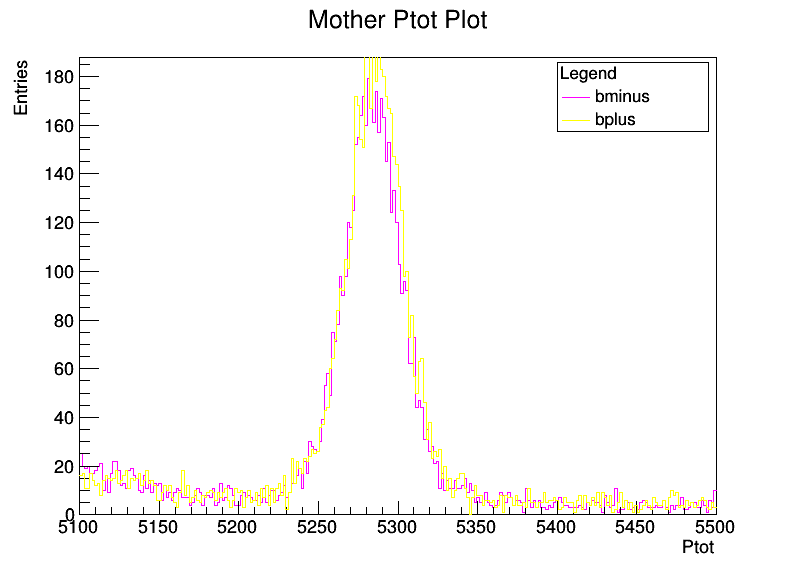

In [79]:
Bplus_cuts = ("H1_Charge+H2_Charge+H3_Charge == 1")
Bminus_cuts = ("H1_Charge+H2_Charge+H3_Charge == -1")

bplusTree = CutTree.CopyTree(Bplus_cuts)
bminusTree = CutTree.CopyTree(Bminus_cuts)


c8 = ROOT.TCanvas("c8", "c8", 800, 600)

bplusTree.Draw("M_m0>>h1(250, 5100, 5500)")
h1 = ROOT.gDirectory.Get("h1")

bminusTree.Draw("M_m0>>h2(250, 5100, 5500)")
h2 = ROOT.gDirectory.Get("h2")

varname = "Ptot"

h2.SetTitle("Mother " + varname + " Plot")
h2.GetXaxis().SetTitle(varname)
h2.GetYaxis().SetTitle("Entries")
h2.SetLineColor(6) # purple
h2.SetLineWidth(1)

h1.SetLineColor(5) # yellow
h1.SetLineWidth(1)


h2.Draw()
h1.Draw("same")

leg = ROOT.TLegend(0.11 + 0.59, 0.77, 0.3 + 0.59, 0.89)
leg.SetHeader("Legend")
leg.AddEntry(h2, "bminus", "l")
leg.AddEntry(h1, "bplus", "l")

leg.Draw("same")

c8.Draw()

In [80]:
mass = ROOT.RooRealVar("M_m0","Mass",5150,5400,"MeV/C^{2}")

gaussMean = ROOT.RooRealVar("Mean","Mean",5000,5150,5400)
gaussWidth = ROOT.RooRealVar("Width","Width",40,0,7000)

Gauss=ROOT.RooGaussian("Gauss","Gaussian Signal",mass,gaussMean,gaussWidth)
Gauss_Norm= ROOT.RooRealVar("Gauss_Norm","Signal Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 3)

exponent=ROOT.RooRealVar("exponent", "C", -0.02, -2, +2)
exp_Norm= ROOT.RooRealVar("exp_Norm","Background Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 2)

Bkgnd=ROOT.RooExponential("Bkgnd","Exponential Background",mass,exponent)

model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),ROOT.RooArgList(Gauss_Norm, exp_Norm) )

data_to_fit=ROOT.RooDataSet("Data Set","data_to_fit", bplusTree, ROOT.RooArgSet(mass))

model.fitTo(data_to_fit)

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Eval -- RooAbsReal::attachToTree(M_m0) TTree Float_t branch M_m0 will be converted to double precision
[#1] INFO:Eval -- RooTreeDataStore::loadValues(Data Set) Ignored 2846 out of range events
[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gauss,Bkgnd)
 **********
 **   37 **SET PRINT           1
 **********
 **********
 **   38 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Gauss_Norm   1.14006e+05  5.70030e+04    0.00000e+00  1.02606e+07
 MINUIT WARNING IN PARAM DEF
 ============== LIMITS ON PARAM1 TOO FAR APART.
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     2 Mean         5.15000e+03  2.50000e+01    5.15000e+03  5.40000e+03
 MINUIT WARNIN

[#1] INFO:Plotting -- RooAbsPdf::plotOn(Full Model) directly selected PDF components: (Gauss)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(Full Model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(Full Model) directly selected PDF components: (Bkgnd)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(Full Model) indirectly selected PDF components: ()


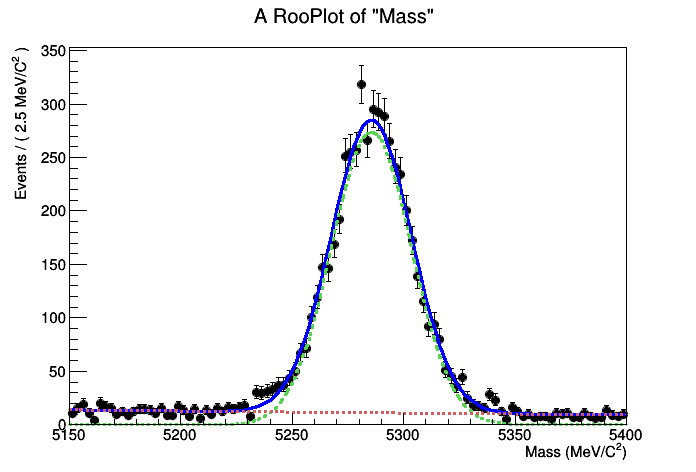

In [81]:
c9=ROOT.TCanvas("c9","c9")
frame=mass.frame()
data_to_fit.plotOn(frame)
model.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(8),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(46),ROOT.RooFit.LineStyle(2))
frame.Draw()
c9.Update()
c9.Draw()

In [82]:
##Counting events and doing some maths
##First B+ events
Bplus_signal_yield = Gauss_Norm.getValV()
Bplus_signal_error = Gauss_Norm.getError()
Bplus_chi2ndf = frame.chiSquare()

print(Bplus_signal_yield, Bplus_signal_error, Bplus_chi2ndf)

(4936.863765310058, 77.27021313019668, 48.87435285189418)


In [83]:
##Now B- events
Bminus_signal_yield = Gauss_Norm.getValV()
Bminus_signal_error = Gauss_Norm.getError()
Bminus_chi2ndf = frame.chiSquare()

print(Bminus_signal_yield, Bminus_signal_error, Bminus_chi2ndf)


(4936.863765310058, 77.27021313019668, 48.87435285189418)


In [84]:
#Here do your calculation of the final result
import math
Assym = (Bminus_signal_yield - Bplus_signal_yield)/(Bminus_signal_yield + Bplus_signal_yield)
Assym_err = math.sqrt((1-Assym**2)/(Bminus_signal_yield + Bplus_signal_yield))

print("A = " + str(Assym) + " +- " + str(Assym_err))

A = 0.0 +- 0.0100637405244
